In [1]:
#importing Libraries
import geopandas as gpd
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#path of the dataframe
path=r"C:\Users\TARUN\Downloads\Spotify_Youtube.csv\Spotify_Youtube.csv"

In [3]:
#reading the csv file as a dataframe
df=pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [6]:
#Taking out the required columns from the original dataframe
df1=df[['Artist', 'Track','Title','Views','Likes']]

In [7]:
df1

,Artist,Track,Title,Views,Likes
0,Gorillaz,Feel Good Inc.,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0
1,Gorillaz,Rhinestone Eyes,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0
3,Gorillaz,On Melancholy Hill,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0
4,Gorillaz,Clint Eastwood,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0
...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,71678.0,1113.0
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,164741.0,2019.0
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,35646.0,329.0
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,6533.0,88.0


In [8]:
#reaming the columns
df2=df1.rename(columns={"Views": "Youtube_Views","Title":"Youtube_Title", "Likes":"Youtube_Likes"})

In [9]:
df2

,Artist,Track,Youtube_Title,Youtube_Views,Youtube_Likes
0,Gorillaz,Feel Good Inc.,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0
1,Gorillaz,Rhinestone Eyes,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0
3,Gorillaz,On Melancholy Hill,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0
4,Gorillaz,Clint Eastwood,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0
...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,71678.0,1113.0
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,164741.0,2019.0
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,35646.0,329.0
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,6533.0,88.0


In [10]:
#filtering the data
df3 = df2[df2.Youtube_Views>10000000]

In [11]:
df3

,Artist,Track,Youtube_Title,Youtube_Views,Youtube_Likes
0,Gorillaz,Feel Good Inc.,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0
1,Gorillaz,Rhinestone Eyes,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0
3,Gorillaz,On Melancholy Hill,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0
4,Gorillaz,Clint Eastwood,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0
5,Gorillaz,DARE,Gorillaz - DARE (Official Video),259021161.0,1844658.0
...,...,...,...,...,...
20685,Jung Kook,Left and Right (Feat. Jung Kook of BTS) - Acap...,Charlie Puth - Left And Right (feat. Jung Kook...,293367976.0,8016899.0
20688,Jung Kook,Left and Right (feat. Jung Kook of BTS) - Inst...,Charlie Puth - Left And Right (feat. Jung Kook...,293367976.0,8016899.0
20689,LE SSERAFIM,ANTIFRAGILE,LE SSERAFIM (르세라핌) 'ANTIFRAGILE' OFFICIAL M/V,113923304.0,2306375.0
20690,LE SSERAFIM,FEARLESS,LE SSERAFIM FEARLESS OFFICIAL M/V,140341264.0,2230799.0


In [12]:
df4=df3[df3.Youtube_Likes>10000000]

In [13]:
df4

,Artist,Track,Youtube_Title,Youtube_Views,Youtube_Likes
20,50 Cent,In Da Club,50 Cent - In Da Club (Official Music Video),1.682616e+09,10481678.0
43,Coldplay,Something Just Like This,The Chainsmokers & Coldplay - Something Just L...,2.118019e+09,10282499.0
47,Coldplay,Hymn for the Weekend,Coldplay - Hymn For The Weekend (Official Video),1.828242e+09,13515772.0
60,Linkin Park,In the End,In The End [Official HD Music Video] - Linkin ...,1.487186e+09,10183387.0
61,Linkin Park,Numb,Numb [Official Music Video] - Linkin Park,1.928734e+09,12341722.0
...,...,...,...,...,...
19636,Lil Nas X,MONTERO (Call Me By Your Name),Lil Nas X - MONTERO (Call Me By Your Name) (Of...,5.186314e+08,10715411.0
19637,Lil Nas X,Old Town Road - Remix,Lil Nas X - Old Town Road (Official Video) ft....,1.069327e+09,11942087.0
19638,Lil Nas X,Old Town Road,Lil Nas X - Old Town Road (Official Video) ft....,1.069327e+09,11942087.0
19966,j-hope,Chicken Noodle Soup (feat. Becky G),j-hope 'Chicken Noodle Soup (feat. Becky G)' MV,3.747844e+08,11774615.0


In [17]:
#sorting the datframe in descening order
df5=df4.sort_values(by='Youtube_Views', ascending=False)

In [18]:
df6=df4.sort_values(by='Youtube_Likes', ascending=False)

In [28]:
#to get top 10 Artists and Songs
df5=df5.head(10)
df5

,Artist,Track,Youtube_Title,Youtube_Views,Youtube_Likes
1147,Luis Fonsi,Despacito,Luis Fonsi - Despacito ft. Daddy Yankee,8.079649e+09,50788652.0
365,Daddy Yankee,Despacito,Luis Fonsi - Despacito ft. Daddy Yankee,8.079647e+09,50788626.0
12452,Ed Sheeran,Shape of You,Ed Sheeran - Shape of You (Official Music Video),5.908398e+09,31047780.0
14580,Charlie Puth,See You Again (feat. Charlie Puth),Wiz Khalifa - See You Again ft. Charlie Puth [...,5.773798e+09,40147674.0
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),Wiz Khalifa - See You Again ft. Charlie Puth [...,5.773797e+09,40147618.0
20303,CoComelon,Wheels on the Bus,Wheels on the Bus | CoComelon Nursery Rhymes &...,4.898831e+09,14396841.0
10686,Mark Ronson,Uptown Funk (feat. Bruno Mars),Mark Ronson - Uptown Funk (Official Video) ft....,4.821016e+09,20067879.0
8937,PSY,Gangnam Style (강남스타일),PSY - GANGNAM STYLE(강남스타일) M/V,4.679767e+09,26399133.0
9569,Maroon 5,Sugar,Maroon 5 - Sugar (Official Music Video),3.817733e+09,15340646.0
13032,Katy Perry,Roar,Katy Perry - Roar (Official),3.725749e+09,15864499.0


In [29]:
df6=df6.head(10)
df6

,Artist,Track,Youtube_Title,Youtube_Views,Youtube_Likes
1147,Luis Fonsi,Despacito,Luis Fonsi - Despacito ft. Daddy Yankee,8.079649e+09,50788652.0
365,Daddy Yankee,Despacito,Luis Fonsi - Despacito ft. Daddy Yankee,8.079647e+09,50788626.0
14580,Charlie Puth,See You Again (feat. Charlie Puth),Wiz Khalifa - See You Again ft. Charlie Puth [...,5.773798e+09,40147674.0
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),Wiz Khalifa - See You Again ft. Charlie Puth [...,5.773797e+09,40147618.0
14561,BTS,Dynamite,BTS (방탄소년단) 'Dynamite' Official MV,1.640946e+09,35892575.0
12452,Ed Sheeran,Shape of You,Ed Sheeran - Shape of You (Official Music Video),5.908398e+09,31047780.0
16030,Halsey,Boy With Luv (feat. Halsey),BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat....,1.634110e+09,27588224.0
14565,BTS,Boy With Luv (feat. Halsey),BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat....,1.634110e+09,27588189.0
16668,Alan Walker,Faded,Alan Walker - Faded,3.400742e+09,26446178.0
8937,PSY,Gangnam Style (강남스타일),PSY - GANGNAM STYLE(강남스타일) M/V,4.679767e+09,26399133.0


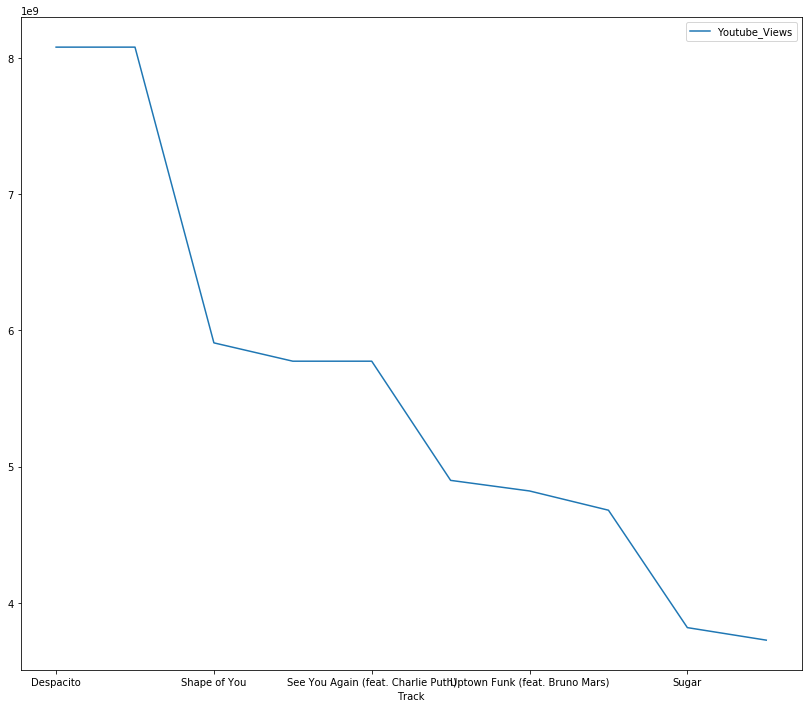

In [30]:
#plotting the graph
df5.plot(x='Track', y='Youtube_Views',figsize=(14,12))

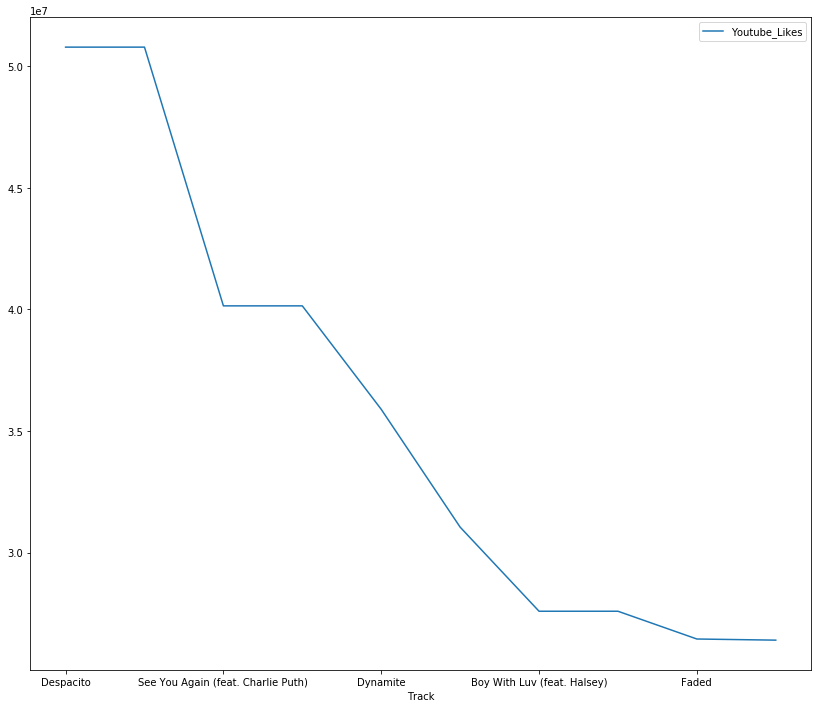

In [31]:
df6.plot(x='Track', y='Youtube_Likes',figsize=(14,12))

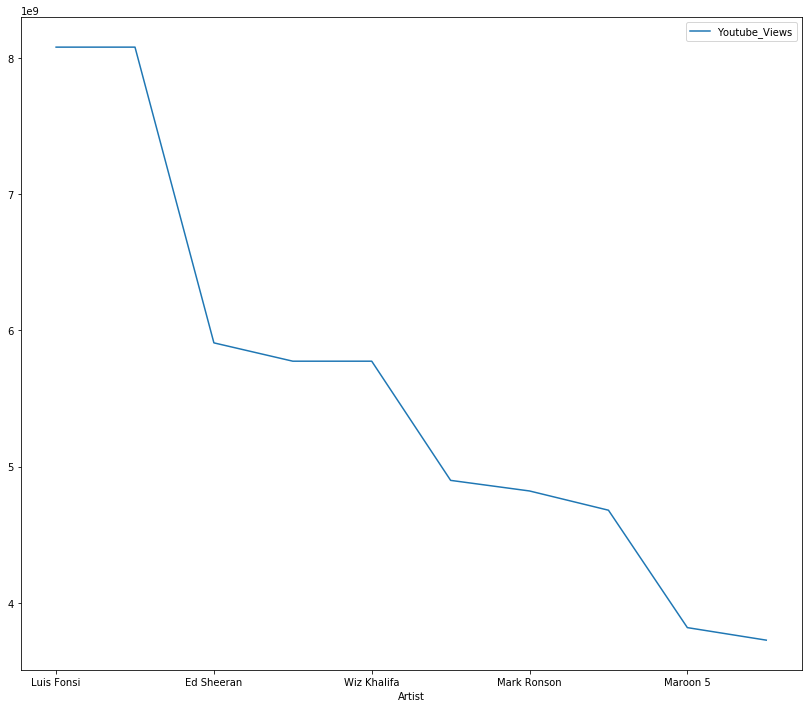

In [32]:
df5.plot(x='Artist', y='Youtube_Views',figsize=(14,12))

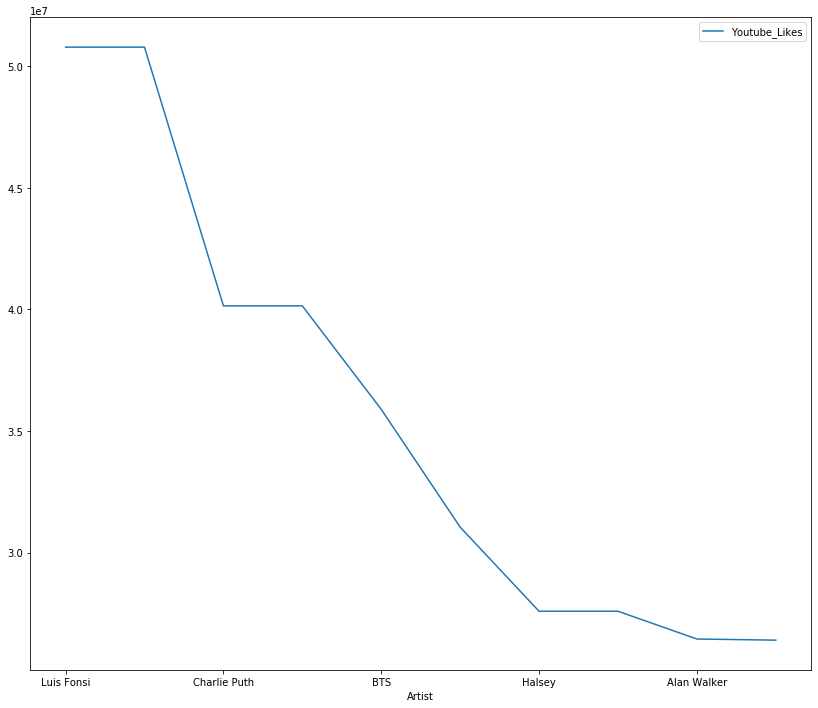

In [27]:
df6.plot(x='Artist', y='Youtube_Likes',figsize=(14,12))